In [8]:
%config IPCompleter.greedy=True

from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm

import numpy as np
import random

import pmdarima as pm
from pmdarima import StepwiseContext
from pmdarima.model_selection import train_test_split

np.random.seed(0)
random.seed(0)

from metrics import calc_tdi_tdm, squared_error, absolute_error

In [9]:
def plot_result(train, test, forecast, model):
    x = np.arange(train.shape[0] + test.shape[0])
    l = len(train)
    
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 2.5))
    axs[0].plot(x[:l], train, c='blue')
    axs[0].plot(x[l:], test, c='red')
    axs[0].plot(x[l:], forecast, c='green')
    axs[0].set_title(f"Series {i}. Best fit: SARIMA{model.to_dict()['order']}{model.to_dict()['seasonal_order']}")
    
    axs[1].plot(x[l:], squared_error(test, forecast))
    axs[1].set_title(f"Squared errors")
    
    axs[2].plot(x[l:], absolute_error(test, forecast))
    axs[2].set_title(f"Absolute errors")
    plt.tight_layout()
    plt.show()

# ARIMA on ECG5000

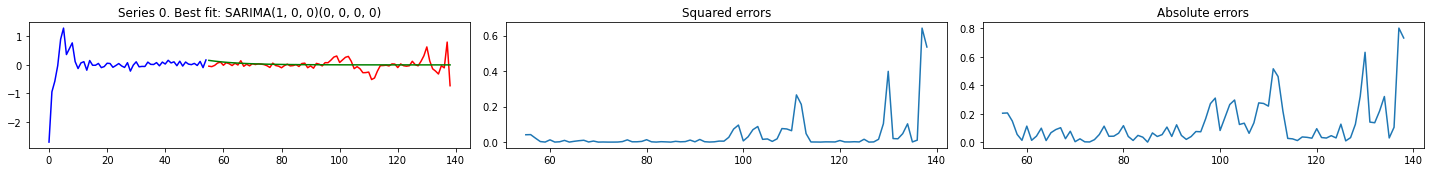

(TDI, TDM):  (0.1760204081632653, -0.4025764895330113)


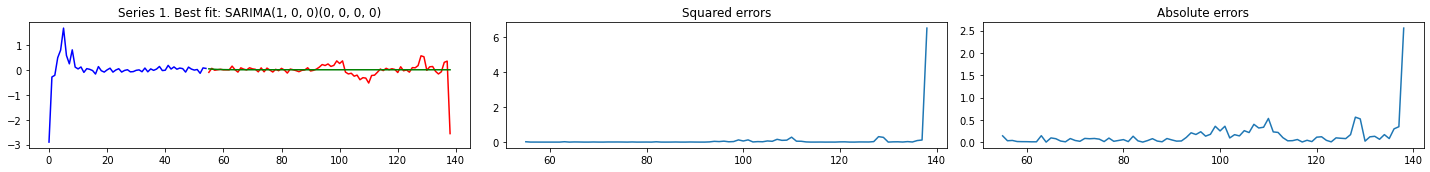

(TDI, TDM):  (0.5038265306122449, -1.0)


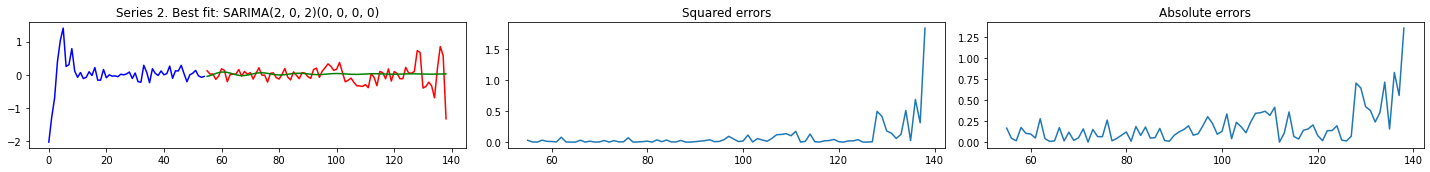

(TDI, TDM):  (0.5136054421768708, -1.0)


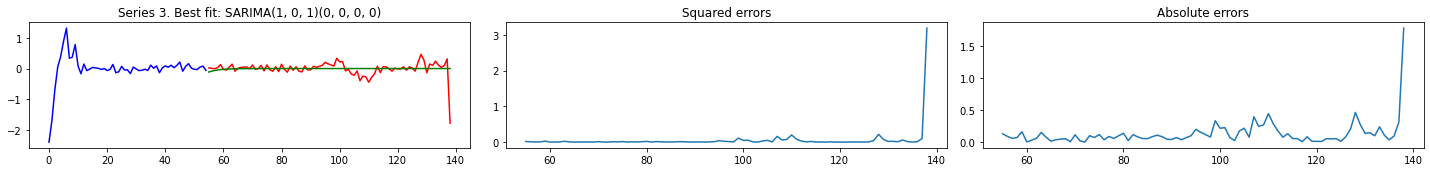

(TDI, TDM):  (0.40235260770975056, -0.9661852765058119)


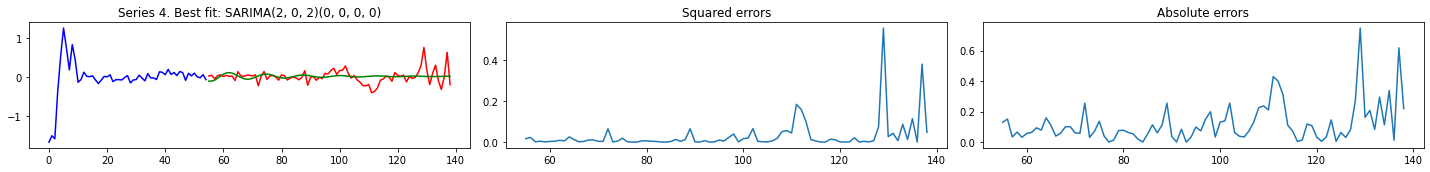

(TDI, TDM):  (0.7203798185941044, -0.9976391894550463)


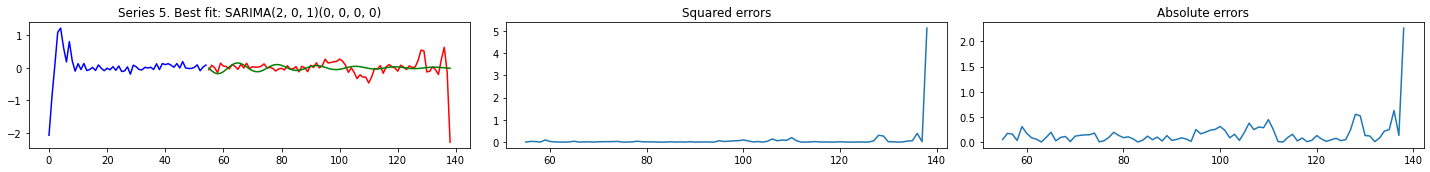

(TDI, TDM):  (0.5817743764172336, -0.9887941534713763)


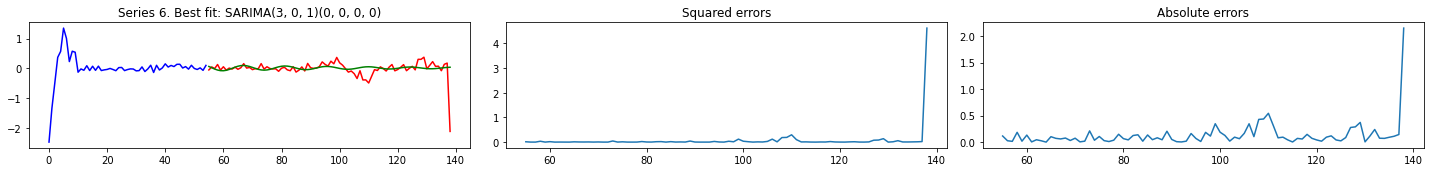

(TDI, TDM):  (0.43367346938775514, -0.9607843137254902)


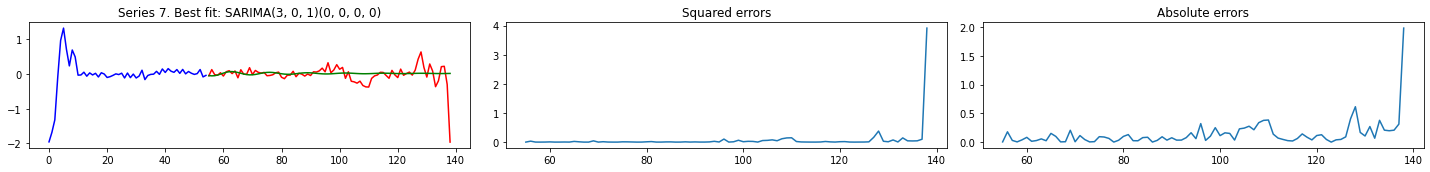

(TDI, TDM):  (0.48072562358276644, -0.9799528301886793)


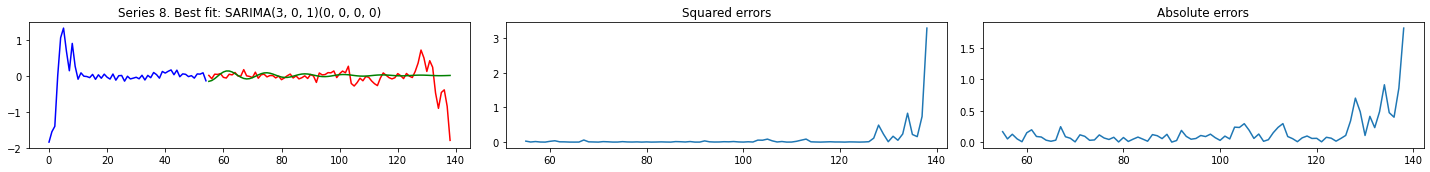

(TDI, TDM):  (0.4785997732426304, -0.9905241338466094)


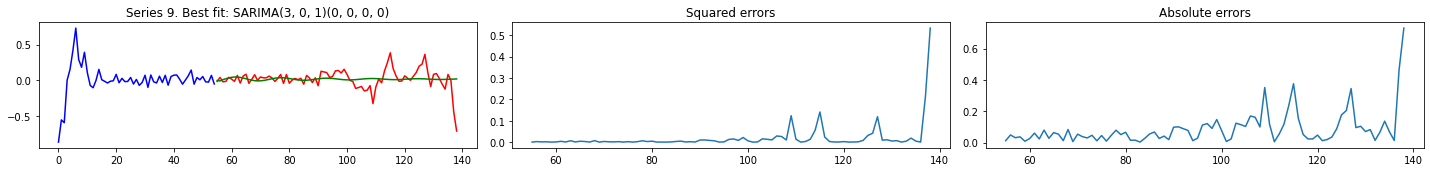

(TDI, TDM):  (0.6258503401360545, -1.0)


In [11]:
# Parameters
n = 10
window = 56
horizon = 84

# Load data
df = pd.read_csv("./data/ECG5000/ECG5000_TRAIN.tsv", delimiter="\t", header=None).drop(0, axis=1).transpose()
df = df.diff().dropna()

for i in range(0, n):
    series = df[i].values
    train, test = train_test_split(series, train_size=window - 1)  # First row was removed by diff()
    
    with StepwiseContext(max_dur=15):
        model = pm.auto_arima(train, stepwise=True, suppress_warnings=True, trace=False, max_p=3, max_q=3, maxiter=35)
        
    forecast = model.predict(n_periods=test.shape[0])  # Predict N steps into the future
    
    plot_result(train, test, forecast, model)
    print("(TDI, TDM): ", calc_tdi_tdm(test, forecast))

# ARIMA on Traffic

C:\Users\eivistr\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:324: UserWarning: early termination of stepwise search due to max_dur threshold (82.561 > 10.000)
  warnings.warn('early termination of stepwise search due to '


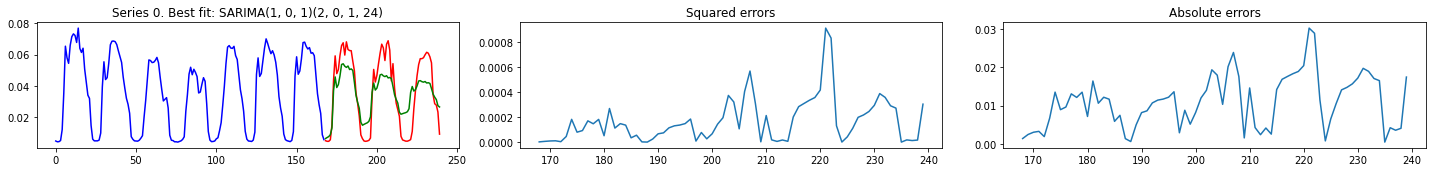

(TDI, TDM):  (0.04822530864197531, -0.504)


C:\Users\eivistr\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:324: UserWarning: early termination of stepwise search due to max_dur threshold (21.711 > 10.000)
  warnings.warn('early termination of stepwise search due to '


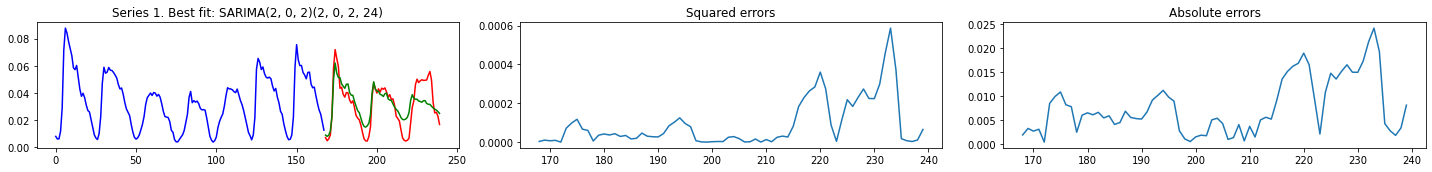

(TDI, TDM):  (0.07253086419753085, -0.5372340425531915)


C:\Users\eivistr\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:324: UserWarning: early termination of stepwise search due to max_dur threshold (11.928 > 10.000)
  warnings.warn('early termination of stepwise search due to '


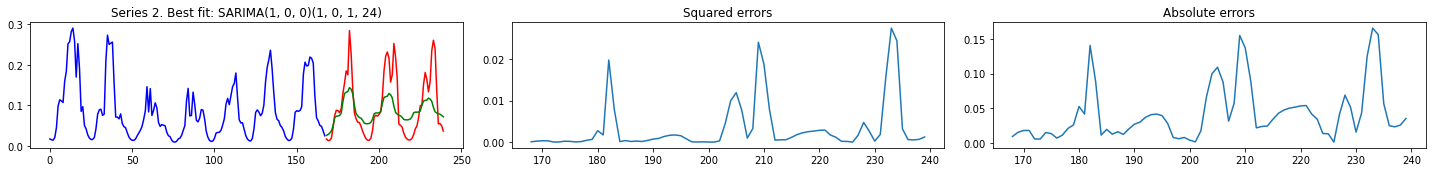

(TDI, TDM):  (0.04822530864197531, -0.128)


C:\Users\eivistr\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:324: UserWarning: early termination of stepwise search due to max_dur threshold (53.914 > 10.000)
  warnings.warn('early termination of stepwise search due to '


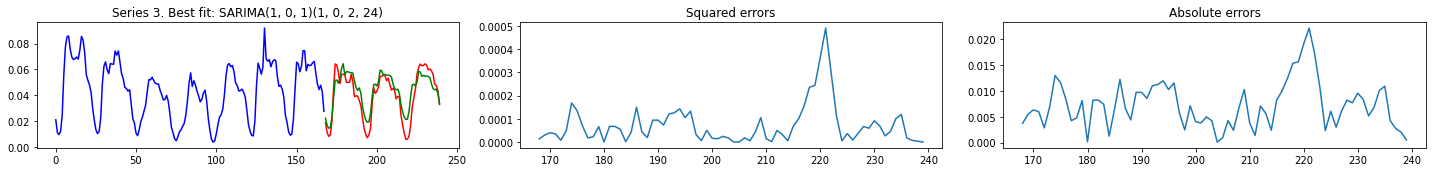

(TDI, TDM):  (0.05999228395061728, 0.12540192926045024)


C:\Users\eivistr\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:324: UserWarning: early termination of stepwise search due to max_dur threshold (46.460 > 10.000)
  warnings.warn('early termination of stepwise search due to '


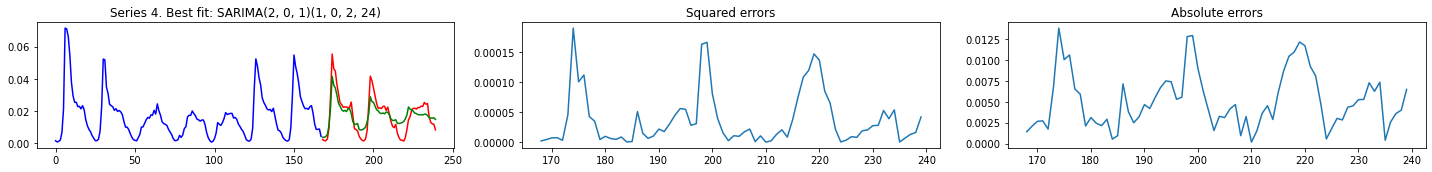

(TDI, TDM):  (0.07600308641975308, -0.7563451776649746)


C:\Users\eivistr\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:324: UserWarning: early termination of stepwise search due to max_dur threshold (11.345 > 10.000)
  warnings.warn('early termination of stepwise search due to '


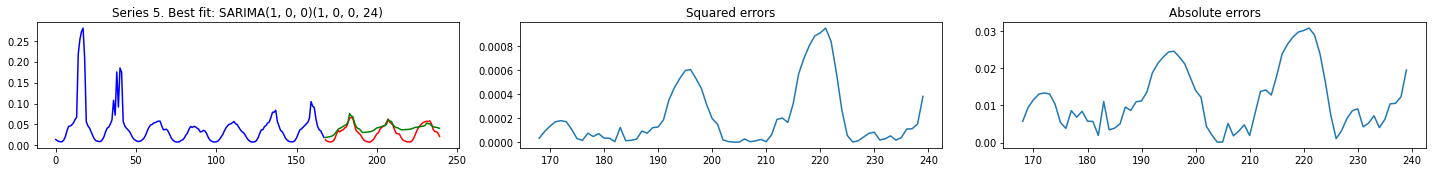

(TDI, TDM):  (0.06655092592592592, -0.5130434782608695)


C:\Users\eivistr\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:324: UserWarning: early termination of stepwise search due to max_dur threshold (13.506 > 10.000)
  warnings.warn('early termination of stepwise search due to '


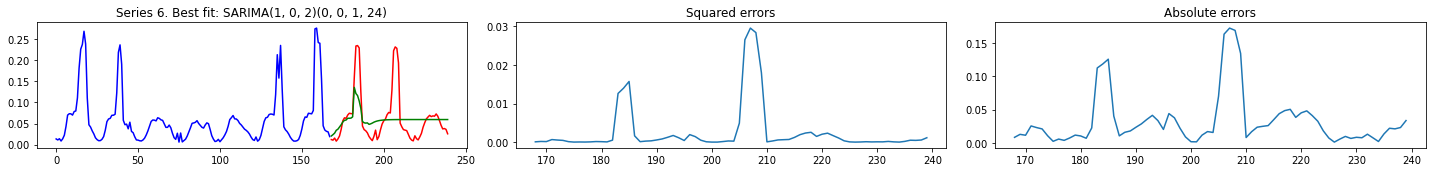

(TDI, TDM):  (0.2891589506172839, -0.9693128752501667)


C:\Users\eivistr\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:324: UserWarning: early termination of stepwise search due to max_dur threshold (44.646 > 10.000)
  warnings.warn('early termination of stepwise search due to '


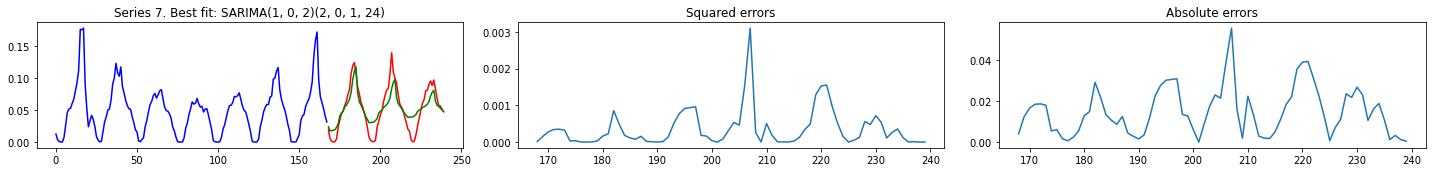

(TDI, TDM):  (0.046875, -0.12757201646090532)


C:\Users\eivistr\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:324: UserWarning: early termination of stepwise search due to max_dur threshold (38.728 > 10.000)
  warnings.warn('early termination of stepwise search due to '


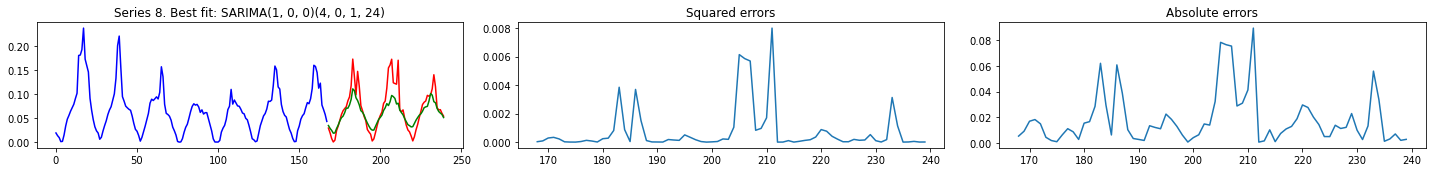

(TDI, TDM):  (0.03414351851851852, 0.02824858757062154)


C:\Users\eivistr\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:324: UserWarning: early termination of stepwise search due to max_dur threshold (21.424 > 10.000)
  warnings.warn('early termination of stepwise search due to '


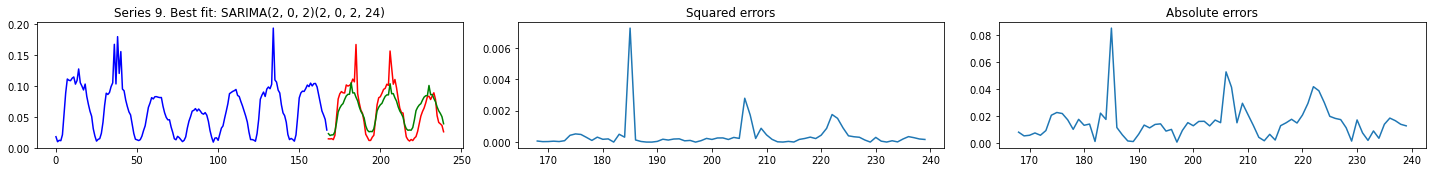

(TDI, TDM):  (0.05362654320987654, -0.15827338129496404)


In [21]:
# Parameters
n = 10
window = 24*7
horizon = 24*3

df = pd.read_csv("./data/mvdata/traffic.txt", usecols=range(0, n), header=None)

for i in range(0, n):
    series = df[i].values[-window-horizon:]
    train, test = train_test_split(series, train_size=window)
    
    with StepwiseContext(max_dur=10):
        model = pm.auto_arima(train, seasonal=True, m=24, suppress_warnings=True, trace=False, error_action='ignore', 
                              stepwise=True, max_p=3, max_q=3, max_P=4, max_Q=4, maxiter=30)
    forecast = model.predict(n_periods=test.shape[0])  # Predict N steps into the future
    
    plot_result(train, test, forecast, model)
    print("(TDI, TDM): ", calc_tdi_tdm(test, forecast))